# Bayes' Theorem

## $$P(A\mid B)=\frac {P(B\mid A) \cdot P(A)}{P(B)}$$

## Terminology

- $P(A)$ : 
    - The probability of an event irrespective of the outcomes of other random variables is called the ***marginal probability***.
    - In reference to Bayes' Theorem, this is known as the ***prior probability***.

- $P(A|B)$ :
    - The probability of one (or more) event(s) given the occurence of another event is called the ***conditional probability***.
    - In reference to Bayes' Theorem, this is known as the ***posterior probability***.

- $P(B|A)$ : ***Likelihood***.

- $P(B)$ : ***Evidence***.

This allows us to restate the theorem as

$$
\textrm{Posterior} = \frac{\textrm{Likelihood}\cdot\textrm{Prior}}{\textrm{Evidence}}
$$

The numerator, $P(B\mid A) \cdot P(A)$, is a **joint probability**.


- A joint probability is the probability of two (or more) simultaneous events
    - $P(A,B)$ or $P(A \cap B) = P(A|B)\cdot P(B)$
    - So, in the theorem: $P(B,A)$ or $P(B \cap A) = P(B|A)\cdot P(A)$

### Examples

_____

- What is the probability that there is rain given that there are clouds?

$$P(rain | clouds) = \frac{P(clouds | rain) * P(rain)}{P(clouds)}$$

_____

- What is the probability that there is fire given that there is smoke?

$$P(fire | smoke) = \frac{P(smoke | fire) * P(fire)}{P(smoke)}$$

_____

- What is the probability that you have cancer given that you tested positive?



_____

Yes, you do just need to remember which piece is which...

<center><img src='https://imgs.xkcd.com/comics/modified_bayes_theorem_2x.png' width=500></center>

[Image Source: XKCD](https://xkcd.com/2059/)

(for the record, $P(C)$ in this example is always very low)

_____


### Bayes' Theorem with...  Legos?

Will Kurt, who writes the [Count Bayesie blog](https://www.countbayesie.com/) and is the author of [_Bayesian Statistics the Fun Way_](https://nostarch.com/learnbayes), uses legos to derive Bayes' Theorem. Let's take a look: https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego

### How About Bayes' Theorem with Waterfalls?

[This great resource by Arbital](https://arbital.com/p/bayes_rule/?l=1zq) will let you go into all kinds of detail about the intuition behind Bayes' Theorem.

We can skip straight to their one-pager: https://arbital.com/p/bayes_rule/?l=693

## Example: 1984 Congressional Voting Data

Let's do an example. Here's the real theorem again for reference:

## $$P(A\mid B)=\frac {P(B\mid A) \cdot P(A)}{P(B)}$$

Data source: [Congressional Quarterly Almanac, 98th Congress, 2nd session 1984](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

A congressman voted no on providing aid to El Salvador. Given that 61% of the congress were Democrats, 74.9% of whom voted 'No' for providing aid to El Salvador, and only 4.8% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

1. Which probability are we trying to find?

    - P(Democrat | No)
    
2. Based on that, what other pieces do we need?

    - P ( No | Democrat) = .749
    - P ( Democrat) = .61
    - P ( No) = .749 * .61 + .048 * .39
    
3. Result?

    - P(Democrat | No) = .749 * .61 / (0.47561) = **96%**


We have this data, we can do this even more exactly:

In [3]:
# Imports, then grab and explore the data
import pandas as pd

df = pd.read_csv("data/clean_house-votes-84.csv")

In [4]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [7]:
# Grab just the data for the el-salvador-aid vote
data = df[['Class Name', 'el-salvador-aid']]

In [8]:
data

,Class Name,el-salvador-aid
0,republican,y
1,republican,y
2,democrat,y
3,democrat,?
4,democrat,y
...,...,...
430,republican,y
431,democrat,n
432,republican,y
433,republican,y


Let's find these pieces exactly!

In [21]:
data['el-salvador-aid'].value_counts()['n']

208

In [16]:
# P (No)

p_no = data['el-salvador-aid'].value_counts()['n'] / len(data)
p_no

0.4781609195402299

In [17]:
# P (dem)

p_dem = data['Class Name'].value_counts()['democrat'] / len(data)
p_dem

0.6137931034482759

In [19]:
# P(No | dem)

dems = data.loc[data['Class Name'] == 'democrat']
dems.head()

,Class Name,el-salvador-aid
2,democrat,y
3,democrat,?
4,democrat,y
5,democrat,y
6,democrat,y


In [20]:
dems['el-salvador-aid'].value_counts()['n']

200

In [22]:
p_no_given_dem = dems['el-salvador-aid'].value_counts()['n'] / len(dems)
p_no_given_dem

0.7490636704119851

In [23]:
# now the math
p_dem_given_no = p_no_given_dem * p_dem / p_no
p_dem_given_no

0.9615384615384617

Or:

In [26]:
no = data.loc[data['el-salvador-aid'] == 'n']

test = no['Class Name'].value_counts()['democrat'] / len(no)
test

0.9615384615384616

### Bonus: MLE? MAP?

If we have time, we can also chat about the two other seemingly-random pieces in this curriculum topic: Maximum Likelihood Estimation (MLE) and the Maximum A Posteriori Estimation (MAP). These are how we estimate parameters given some data.

For this, let's go back to Will Kurt: 

> "When we start learning probability we often are told the probability of an event and from there try to estimate the likelihood of various outcomes. In reality the inverse is much more common: we have data about the outcomes but don't really know what the true probability of the event is. Trying to figure out this missing parameter is referred to as Parameter Estimation."

-- https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function

Also: https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-adding-bayesian-priors

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

(0.005, 0.01)

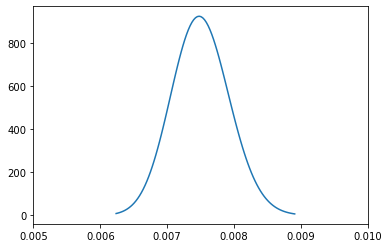

In [30]:
a = 300
b = 39700

x = np.linspace(stats.beta.ppf(0.001, a, b),
                stats.beta.ppf(0.999, a, b), 100)

plt.plot(x, stats.beta.pdf(x, a, b))
plt.xlim(.005, .01)

(0, 1)

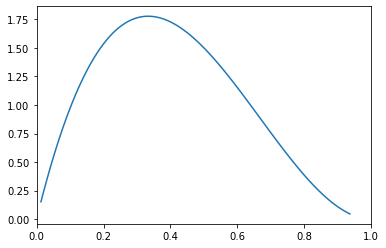

In [32]:
a = 2
b = 3

x = np.linspace(stats.beta.ppf(0.001, a, b),
                stats.beta.ppf(0.999, a, b), 100)

plt.plot(x, stats.beta.pdf(x, a, b))
plt.xlim(0, 1)

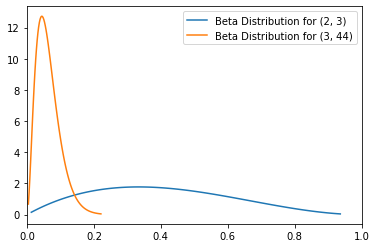

In [36]:
for odds in [(2,3), (2+1, 3+41)]:
    a = odds[0]
    b = odds[1]

    x = np.linspace(stats.beta.ppf(0.001, a, b),
                    stats.beta.ppf(0.999, a, b), 100)

    plt.plot(x, stats.beta.pdf(x, a, b),
             label = f'Beta Distribution for {odds}')
plt.xlim(0, 1)
plt.legend()